In [45]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [101]:
df = pd.read_csv('vietnam_housing_dataset.csv')
df.head()

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90


# DATA STRUCTURE & TYPES

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30229 non-null  object 
 1   Area               30229 non-null  float64
 2   Frontage           18665 non-null  float64
 3   Access Road        16932 non-null  float64
 4   House direction    8990 non-null   object 
 5   Balcony direction  5246 non-null   object 
 6   Floors             26626 non-null  float64
 7   Bedrooms           25067 non-null  float64
 8   Bathrooms          23155 non-null  float64
 9   Legal status       25723 non-null  object 
 10  Furniture state    16110 non-null  object 
 11  Price              30229 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.8+ MB


In [49]:
df.shape

(30229, 12)

In [50]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Address,30229,10265,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,30229.0,NaN,NaN,NaN,68.498741,48.069835,3.1,40.0,56.0,80.0,595.0
Frontage,18665.0,NaN,NaN,NaN,5.361692,4.346174,1.0,4.0,4.5,5.0,77.0
Access Road,16932.0,NaN,NaN,NaN,7.8538,7.451313,1.0,4.0,6.0,10.0,85.0
House direction,8990,8,Đông - Nam,1916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balcony direction,5246,8,Đông - Nam,1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Floors,26626.0,NaN,NaN,NaN,3.410426,1.328897,1.0,2.0,3.0,4.0,10.0
Bedrooms,25067.0,NaN,NaN,NaN,3.51103,1.309116,1.0,3.0,3.0,4.0,9.0
Bathrooms,23155.0,NaN,NaN,NaN,3.346837,1.400181,1.0,2.0,3.0,4.0,9.0
Legal status,25723,2,Have certificate,24774,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DATA QUALITY

In [51]:
df.isnull().sum()

Address                  0
Area                     0
Frontage             11564
Access Road          13297
House direction      21239
Balcony direction    24983
Floors                3603
Bedrooms              5162
Bathrooms             7074
Legal status          4506
Furniture state      14119
Price                    0
dtype: int64

In [52]:
df.duplicated().sum()

0

# OUTLIERS

<Axes: xlabel='Area', ylabel='Density'>

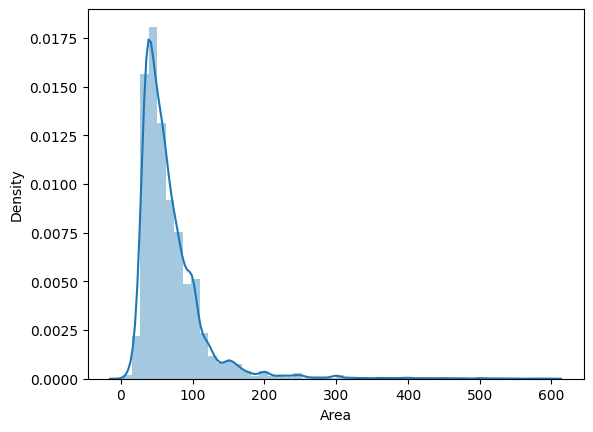

In [53]:
sns.distplot(df['Area'])

<Axes: xlabel='Price', ylabel='Count'>

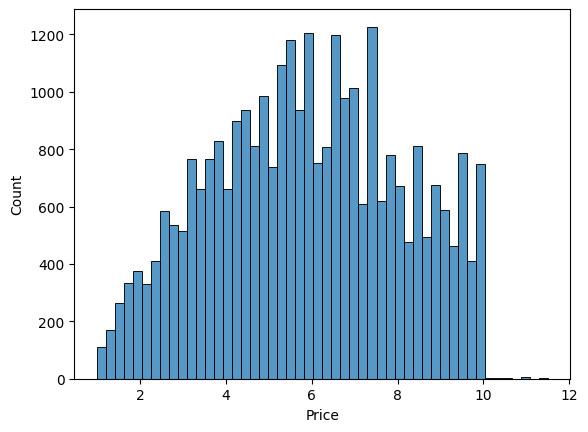

In [54]:
sns.histplot(df['Price'])

In [55]:
area_min = df['Area'].min()
area_mean = df['Area'].mean()
area_max = df['Area'].max()

print(f'Area min value is: {area_min}')
print(f'Area mean value is: {area_mean}')
print(f'Area max value is: {area_max}')

Area min value is: 3.1
Area mean value is: 68.49874127493467
Area max value is: 595.0


<Axes: xlabel='Area', ylabel='Density'>

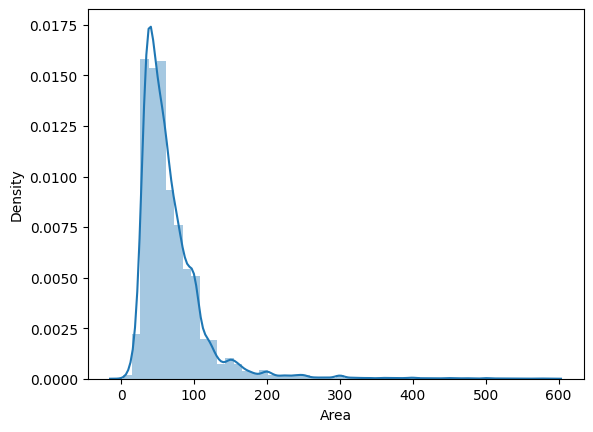

In [56]:
sns.distplot(df['Area'][df['Area'] != area_max])

In [57]:
df['Area'].value_counts().to_frame().reset_index(drop=False).sort_values(by='Area', ascending=False).head(20)

,Area,count
785,595.0,2
1315,585.0,1
822,580.0,2
1504,577.6,1
787,569.0,2
1433,568.9,1
1388,550.0,1
1358,548.0,1
1170,544.0,1
790,540.0,2


*No significant outliers spotted for Area.*

# CORRELATION & RELATIONSHIP

In [58]:
numerical_variables = ['Price', 'Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms']
df[numerical_variables].corr()

,Price,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms
Price,1.000000,0.097593,0.047469,0.164280,0.331639,0.389432,0.434101
Area,0.097593,1.000000,0.261108,0.269203,-0.359341,0.029541,-0.039367
Frontage,0.047469,0.261108,1.000000,0.142082,-0.039783,0.015079,0.013736
Access Road,0.164280,0.269203,0.142082,1.000000,-0.055556,0.073892,0.072499
Floors,0.331639,-0.359341,-0.039783,-0.055556,1.000000,0.498771,0.620851
Bedrooms,0.389432,0.029541,0.015079,0.073892,0.498771,1.000000,0.782130
Bathrooms,0.434101,-0.039367,0.013736,0.072499,0.620851,0.782130,1.000000


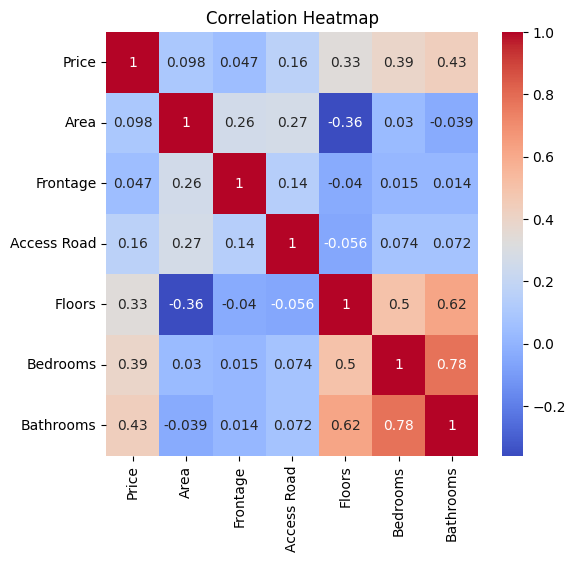

In [59]:
plt.figure(figsize=(6, 5.5))
sns.heatmap(df[numerical_variables].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

*High correlation between Floors, Bedrooms and Bathrooms => Better to drop Bathrooms because Pearson Coefficient with Bedrooms > 0.5 (=0.78) and with Floors > 0.5 (0.62).*

### **Categorical variables**

<Axes: xlabel='Legal status', ylabel='Price'>

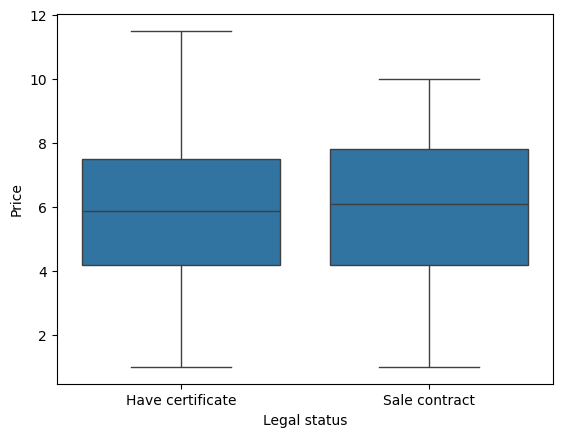

In [60]:
sns.boxplot(data=df, x='Legal status', y='Price')

<Axes: xlabel='Furniture state', ylabel='Price'>

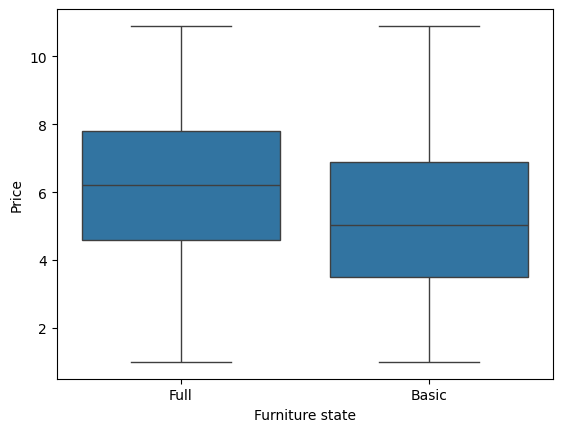

In [61]:
sns.boxplot(data=df, x='Furniture state', y='Price')

*No clear relationship between Legal status, Furniture state and Price, also considering the number of null values for Furniture state (144,119) => It's better to drop these 2 columns as well.*

# DATA CLEANING & TRANSFORMATION

In [102]:
# Drop columns: Bathrooms, Legal status, Furniture state along with House direction & Balcony direction (due to the extremely high number of null values)

df = df.drop(columns=['Bathrooms', 'Legal status', 'Furniture state', 'House direction', 'Balcony direction'])

In [103]:
df.head()

,Address,Area,Frontage,Access Road,Floors,Bedrooms,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,4.0,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,5.0,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,5.0,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,2.0,2.0,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,2.0,4.0,6.90


In [104]:
# Rename columns for easier referencing

df.columns = df.columns.str.lower().str.replace(r'[^a-zA-Z0-9]', '_', regex=True)
df.head()

,address,area,frontage,access_road,floors,bedrooms,price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,4.0,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,5.0,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,5.0,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,2.0,2.0,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,2.0,4.0,6.90


In [105]:
df = df.dropna()
df.isnull().sum()

address        0
area           0
frontage       0
access_road    0
floors         0
bedrooms       0
price          0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12296 entries, 7 to 30224
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   address      12296 non-null  object 
 1   area         12296 non-null  float64
 2   frontage     12296 non-null  float64
 3   access_road  12296 non-null  float64
 4   floors       12296 non-null  float64
 5   bedrooms     12296 non-null  float64
 6   price        12296 non-null  float64
dtypes: float64(6), object(1)
memory usage: 768.5+ KB


In [107]:
# Extract the City part from the Address

In [108]:
df['address'] = df['address'].str.split(', ').str[-1].str.strip().str.split('.').str.get(0)
df['address'].unique()

array(['Hà Nội', 'Hưng Yên', 'Quảng Ninh', 'Hồ Chí Minh', 'Phú Thọ',
       'Bình Dương', 'Bình Thuận', 'Hà Nam', 'Long An', 'Bắc Ninh',
       'Thanh Hóa', 'Khánh Hòa', 'Đà Nẵng', 'Bà Rịa Vũng Tàu', 'Đồng Nai',
       'Hải Phòng', 'Tuyên Quang', 'Nghệ An', 'Lâm Đồng', 'Hòa Bình',
       'Sơn La', 'Bình Định', 'Cần Thơ', 'Vĩnh Phúc', 'Kiên Giang',
       'Hà Tĩnh', 'Hải Dương', 'Đắk Lắk', 'Tiền Giang', 'Hà Nội',
       'Thừa Thiên Huế', 'Lào Cai', 'Điện Biên', 'Thái Bình', 'Quảng Nam',
       'Quảng Trị', 'Tây Ninh', 'Bắc Giang', 'Bình Phước', 'Bến Tre',
       'An Giang', 'TPHCM', 'Phòng công chứng Nguyễn Thị Thành',
       'Quảng Ngãi', 'Hà Giang', 'Phú Yên', 'Thái Nguyên', 'Trà Vinh',
       'Nam Định', 'Sóc Trăng', 'Gia Lai', 'Yên Bái', 'Ninh Bình',
       'Cà Mau', 'Bạc Liêu', 'Ninh Thuận', 'Vĩnh Long', 'Đồng Tháp',
       'Quận Nam Từ Liêm', 'Quảng Ninh (Ngã 3 đường Hòn Gai cũ)'],
      dtype=object)

In [109]:
len(df['address'].unique())

60

In [110]:
# Fix 2 'Hà Nội' unique values 

import unicodedata

df['address'] = df['address'].apply(lambda x: unicodedata.normalize('NFC', x))
df['address'].unique()

array(['Hà Nội', 'Hưng Yên', 'Quảng Ninh', 'Hồ Chí Minh', 'Phú Thọ',
       'Bình Dương', 'Bình Thuận', 'Hà Nam', 'Long An', 'Bắc Ninh',
       'Thanh Hóa', 'Khánh Hòa', 'Đà Nẵng', 'Bà Rịa Vũng Tàu', 'Đồng Nai',
       'Hải Phòng', 'Tuyên Quang', 'Nghệ An', 'Lâm Đồng', 'Hòa Bình',
       'Sơn La', 'Bình Định', 'Cần Thơ', 'Vĩnh Phúc', 'Kiên Giang',
       'Hà Tĩnh', 'Hải Dương', 'Đắk Lắk', 'Tiền Giang', 'Thừa Thiên Huế',
       'Lào Cai', 'Điện Biên', 'Thái Bình', 'Quảng Nam', 'Quảng Trị',
       'Tây Ninh', 'Bắc Giang', 'Bình Phước', 'Bến Tre', 'An Giang',
       'TPHCM', 'Phòng công chứng Nguyễn Thị Thành', 'Quảng Ngãi',
       'Hà Giang', 'Phú Yên', 'Thái Nguyên', 'Trà Vinh', 'Nam Định',
       'Sóc Trăng', 'Gia Lai', 'Yên Bái', 'Ninh Bình', 'Cà Mau',
       'Bạc Liêu', 'Ninh Thuận', 'Vĩnh Long', 'Đồng Tháp',
       'Quận Nam Từ Liêm', 'Quảng Ninh (Ngã 3 đường Hòn Gai cũ)'],
      dtype=object)

In [111]:
len(df['address'].unique())

59

In [112]:
# Transform 'address' column to 3 values only: HN, HCMC, Others

In [113]:
df['address'] = df['address'].apply(lambda x: 'Hồ Chí Minh' if x in ['TPHCM', 'Phòng công chứng Nguyễn Thị Thành'] else 'Hà Nội' if 'Quận Nam Từ Liêm' in x else x)

len(df['address'].unique())

56

In [114]:
df['address'] = df['address'].apply(lambda x: 'HN' if 'Hà Nội' in x else 'HCMC' if 'Hồ Chí Minh' in x else 'Others')

df['address'].unique()

array(['HN', 'Others', 'HCMC'], dtype=object)

In [115]:
df = df.rename(columns={'address': 'city'})

df.head()

,city,area,frontage,access_road,floors,bedrooms,price
7,HN,74.0,5.0,18.0,5.0,4.0,9.9
10,Others,80.0,5.0,13.0,5.0,6.0,10.0
11,Others,70.0,6.0,13.0,5.0,6.0,9.8
16,Others,300.0,15.0,32.0,3.0,6.0,9.4
18,Others,65.0,5.0,20.0,5.0,5.0,7.8


In [116]:
df.dtypes

city            object
area           float64
frontage       float64
access_road    float64
floors         float64
bedrooms       float64
price          float64
dtype: object

In [117]:
df.shape

(12296, 7)

In [118]:
# Reset index

df = df.reset_index(drop=True)
df.tail()

,city,area,frontage,access_road,floors,bedrooms,price
12291,HCMC,51.6,4.0,6.0,2.0,2.0,5.20
12292,HN,45.0,7.0,7.0,5.0,3.0,9.30
12293,HCMC,31.0,3.0,3.0,3.0,4.0,3.98
12294,HCMC,24.0,3.0,3.0,3.0,2.0,3.50
12295,HCMC,67.0,4.1,16.0,1.0,3.0,4.60


In [119]:
df_groups = df[['city', 'price']]
df_address = df_groups.groupby('city', as_index=False).mean().sort_values(by='price', ascending=True).reset_index(drop=True)
df_address

,city,price
0,Others,4.990313
1,HN,6.077141
2,HCMC,6.140026


<Axes: xlabel='city', ylabel='price'>

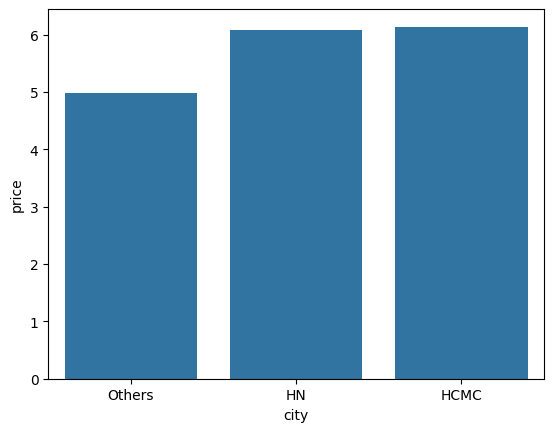

In [120]:
sns.barplot(data=df_address, x='city', y='price')

*We can clearly see that the average house prices in Hanoi and Ho Chi Minh City are significantly higher than the rest.*

# MULTIPLE LINEAR REGRESSION

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
# Get 2 dummy variables for address

In [123]:
dummy_variables = pd.get_dummies(df['city'], dtype=int).drop('Others', axis=1)
dummy_variables

,HCMC,HN
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
12291,1,0
12292,0,1
12293,1,0
12294,1,0


In [124]:
df = pd.concat([df, dummy_variables], axis=1)
df = df.drop('city', axis=1)


df.head()

,area,frontage,access_road,floors,bedrooms,price,HCMC,HN
0,74.0,5.0,18.0,5.0,4.0,9.9,0,1
1,80.0,5.0,13.0,5.0,6.0,10.0,0,0
2,70.0,6.0,13.0,5.0,6.0,9.8,0,0
3,300.0,15.0,32.0,3.0,6.0,9.4,0,0
4,65.0,5.0,20.0,5.0,5.0,7.8,0,0


In [125]:
# Split dataset into training and testing datasets

from sklearn.model_selection import train_test_split

x_data = df[['area', 'frontage', 'access_road', 'floors', 'bedrooms', 'HN', 'HCMC']]
y_data = df[['price']]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

In [126]:
# Train the datasets

lr = LinearRegression()

lr.fit(x_train, y_train)

rsquared_mlr = lr.score(x_test, y_test)
print(f'R^2 of the model is {rsquared_mlr}')

R^2 of the model is 0.3371334385129299


In [127]:
from sklearn.metrics import mean_squared_error

yhat = lr.predict(x_test)

mse_mlr = mean_squared_error(y_test, yhat)
print(f'MSE of the model is: {mse_mlr}')

MSE of the model is: 3.1832196509450212


In [159]:
intercept = round(lr.intercept_[0], 4)
coef = []
for n in range(0,7):
    coef.append(round(lr.coef_[0,n], 4))

print('The linear function of the model is:')
print(f'price = {intercept} + {coef[0]} x area + {coef[1]} x frontage + {coef[2]} x access_road + {coef[3]} x floors + {coef[4]} x bedrooms + {coef[5]} x HN + {coef[6]} x HCM')

The linear function of the model is:
price = 0.4525 + 0.0146 x area + 0.0047 x frontage + 0.0495 x access_road + 0.564 x floors + 0.3049 x bedrooms + 1.1279 x HN + 1.7245 x HCM


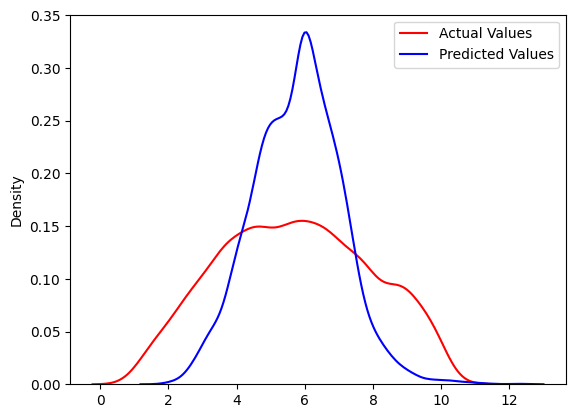

In [90]:
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(yhat, hist=False, color='b', label='Predicted Values', ax=ax1)
plt.legend()
plt.show()

# POLYNOMIAL REGRESSION

In [91]:
from sklearn.preprocessing import PolynomialFeatures

R_squared = []
MSE = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    
    lr.fit(x_train_pr, y_train)
    yhat = lr.predict(x_test_pr)
    
    R_squared.append(lr.score(x_test_pr, y_test))
    MSE.append(mean_squared_error(y_test, yhat))

print(R_squared)
print(MSE)

[0.3371334385129299, 0.40988368723323443, 0.43711981312203896, 0.2070938116347909, -5.196286183100154]
[3.1832196509450212, 2.833858203570023, 2.7030648038390783, 3.8076963099446997, 29.75582279587997]


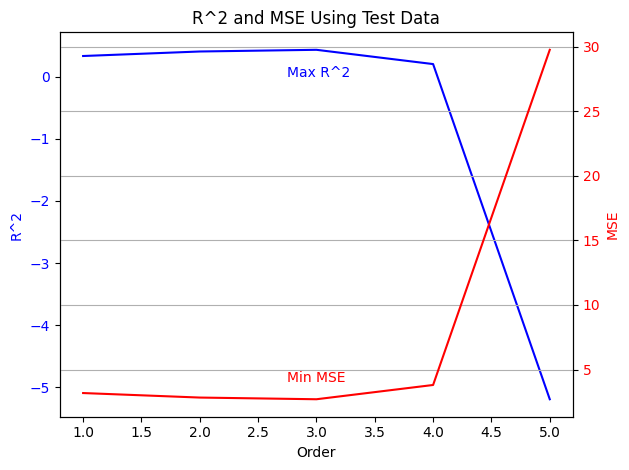

In [92]:
fig, ax1 = plt.subplots()

# Plot R^2 on the primary y-axis
ax1.plot(order, R_squared, color='blue', label='R^2')
ax1.set_xlabel('Order')
ax1.set_ylabel('R^2', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for MSE
ax2 = ax1.twinx()
ax2.plot(order, MSE, color='red', label='MSE')
ax2.set_ylabel('MSE', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding annotations
ax1.text(2.75, 0, 'Max R^2', color='blue', fontsize=10)
ax2.text(2.75, 4, 'Min MSE', color='red', fontsize=10)

# Add a title and grid
plt.title('R^2 and MSE Using Test Data')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.grid()

# Show the plot
plt.show()

In [93]:
# Choose 3rd order for Polynomial Regression

## Normalize variables by using StandardScaler then integrate into a Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=3)), ('Model', LinearRegression())]
pipe = Pipeline(input)
pipe.fit(x_train, y_train)


rsquared_pipe = pipe.score(x_test, y_test)
mse_pipe = mean_squared_error(y_test, pipe.predict(x_test))

print(f'R^2 of the model is: {rsquared_pipe}')
print(f'MSE of the model is: {mse_pipe}')





R^2 of the model is: 0.4371202364807678
MSE of the model is: 2.70306277078461


# RIDGE REGRESSION

In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = [{'alpha': [0.1,1,10,100]}]
RR = Ridge()
Grid = GridSearchCV(RR, parameters, cv=4)

pr = PolynomialFeatures(degree=3)
scale = StandardScaler()

x_data_pr = pr.fit_transform(x_data)
scale.fit(x_data_pr)
x_scale = scale.transform(x_data_pr)

Grid.fit(x_scale, y_data)

GridSearchCV(cv=4, estimator=Ridge(), param_grid=[{'alpha': [0.1, 1, 10, 100]}])

In [95]:
best_ridgemodel = Grid.best_estimator_

best_ridgemodel

Ridge(alpha=10)

In [96]:
scores = Grid.cv_results_
scores['mean_test_score']

array([0.41377959, 0.41604136, 0.42100635, 0.42020838])

In [97]:
from sklearn.metrics import r2_score

y_pred = best_ridgemodel.predict(x_scale)

rsquared_ridge = r2_score(y_data, y_pred)
mse_ridge = mean_squared_error(y_data, y_pred)

print(f'R^2 of the model is: {rsquared_ridge}')
print(f'MSE of the model is: {mse_ridge}')

R^2 of the model is: 0.45458877738599746
MSE of the model is: 2.627638662045667


In [98]:
# Determine the best regression model

In [99]:
data = {
    'model': ['Multiple Linear Regression', 'Polynomial Regression', 'Ridge Regression'],
    'r_squared': [rsquared_mlr, rsquared_pipe, rsquared_ridge],
    'mean_squared_error': [mse_mlr, mse_pipe, mse_ridge]
    }

df_models = pd.DataFrame(data)

df_models.sort_values(by='r_squared', ascending=False).reset_index(drop=True)

,model,r_squared,mean_squared_error
0,Ridge Regression,0.454589,2.627639
1,Polynomial Regression,0.437120,2.703063
2,Multiple Linear Regression,0.337133,3.183220


*Based on the results of R^2 and Mean Squared Error (MSE), Ridge Regression will be chosen as the model for this dataset. However, it is worth noting that different models other than regression models might be more suitable choices for this dataset.*